# **Impute Missing Values**


In this notebook, we will be performing

-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 136.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 202.5 MB/s eta 0:00:00


### Step 1: Import Required Libraries


In [3]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


##### Task 2: Remove the duplicate rows from the dataframe.



In [ ]:
## Write your code here

### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [5]:
# Identify missing values for all columns
missing_values = df.isnull().sum()
print("Missing values for all columns:")
print(missing_values)

Missing values for all columns:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [10]:
# Count the number of missing values in the 'RemoteWork' column
missing_values = df['RemoteWork'].isnull().sum()
print(f'Number of missing values in column RemoteWork: {missing_values}')

Number of missing values in column RemoteWork: 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [13]:
# Get the count of unique values in the 'RemoteWork' column
value_counts = df['RemoteWork'].value_counts()
print(value_counts)

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [19]:
most_frequent_value = df["RemoteWork"].value_counts().idxmax()
print(f"The most frequent value in 'RemoteWork': {most_frequent_value}")

The most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [20]:
df['RemoteWork'].fillna(most_frequent_value, inplace=True)
# Verify the changes, previously it has 10631 missing values.
print(df['RemoteWork'].isnull().sum())

0


##### Task 8: Check for any compensation-related columns and describe their distribution.



In [22]:
# Define the keywords for compensation-related columns
keywords = ["Comp", "Salary", "Income"]

# Find columns that contain any of the specified keywords
compensation_columns = [col for col in df.columns if any(word in col for word in keywords)]

# Print the found compensation-related columns
print(compensation_columns)

['CompTotal', 'AIComplex', 'ConvertedCompYearly']


In [25]:
# Get a summary of statistics for the compensation-related columns
compensation_summary = df[compensation_columns].describe()
print(compensation_summary)

           CompTotal  ConvertedCompYearly
count   3.374000e+04         2.343500e+04
mean   2.963841e+145         8.615529e+04
std    5.444117e+147         1.867570e+05
min     0.000000e+00         1.000000e+00
25%     6.000000e+04         3.271200e+04
50%     1.100000e+05         6.500000e+04
75%     2.500000e+05         1.079715e+05
max    1.000000e+150         1.625660e+07


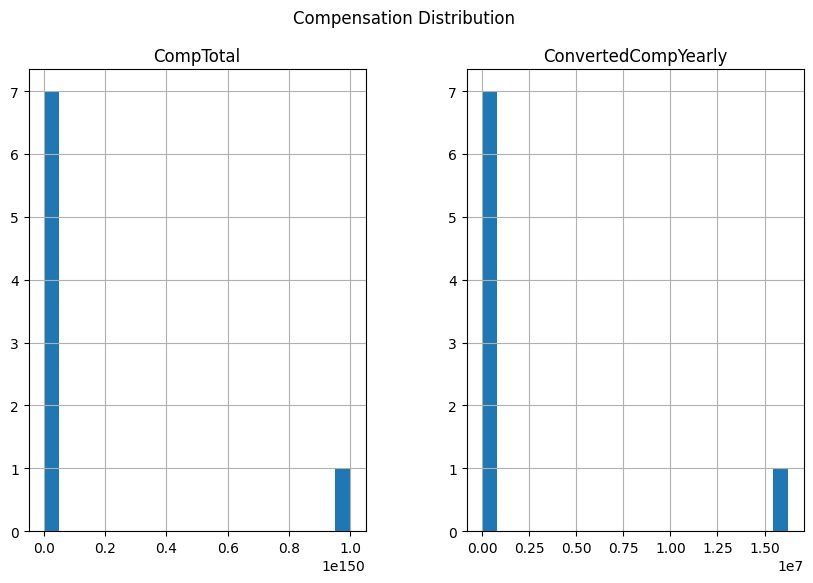

In [38]:
#Visualize the Distribution
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each compensation-related column

compensation_summary.hist(bins=20, figsize=(10, 6))
plt.suptitle('Compensation Distribution')
plt.show()

